<a href="https://colab.research.google.com/github/yuvalmay30/CV-Curriculum/blob/main/ps4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [2]:
def calculate_derivatives(image, ksize):
  grad_x = cv2.Sobel(image, cv2.CV_32F, 1, 0, ksize=ksize)
  grad_y = cv2.Sobel(image, cv2.CV_32F, 0, 1, ksize=ksize)

  return grad_x, grad_y


def generate_gradient_pair_images(image_path, output_file_path):
  image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

  image_grad_x, image_grad_y = calculate_derivatives(image, 3)

  image_grad_x = cv2.normalize(image_grad_x, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
  image_grad_y = cv2.normalize(image_grad_y, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)

  image_gradient_pair = np.concatenate((image_grad_x, image_grad_y), axis=1)

  cv2.imwrite(output_file_path, image_gradient_pair)
  

In [3]:
def ps4_1_a():
  generate_gradient_pair_images('transA.jpg', 'output/ps4-1-a-1.jpg')
  generate_gradient_pair_images('simA.jpg', 'output/ps4-1-a-2.jpg')

ps4_1_a()

In [4]:
def get_gaussian_kernel_matrix(window_size = 5):
  pre_gaussian_kerner = np.zeros((window_size, window_size))
  pre_gaussian_kerner[int(window_size / 2), int(window_size / 2)] = 1.0

  gaussian_kernel = cv2.GaussianBlur(pre_gaussian_kerner, (window_size, window_size), 1)
  return gaussian_kernel


def get_window_in_image(image, x_center_index, y_center_index, half_window_size):
  return image[x_center_index - half_window_size : x_center_index + half_window_size + 1, 
               y_center_index - half_window_size : y_center_index + half_window_size + 1]


def sum_gaussian_kernel_in_window(image, x_center_index, y_center_index, half_window_size, gaussian_kernel):
  window = get_window_in_image(image, x_center_index, y_center_index, half_window_size)

  return np.sum(gaussian_kernel * window)

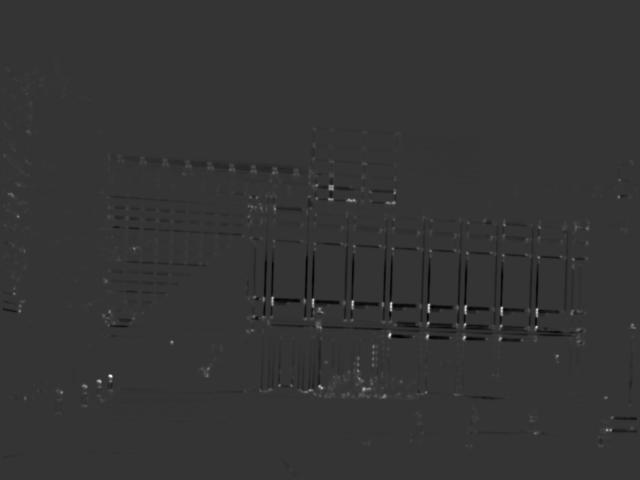

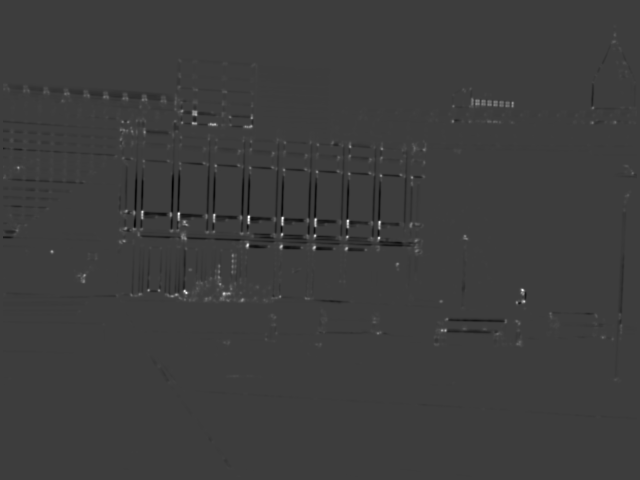

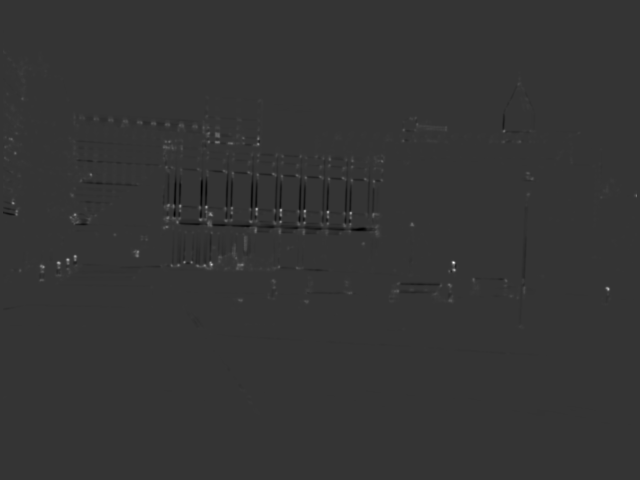

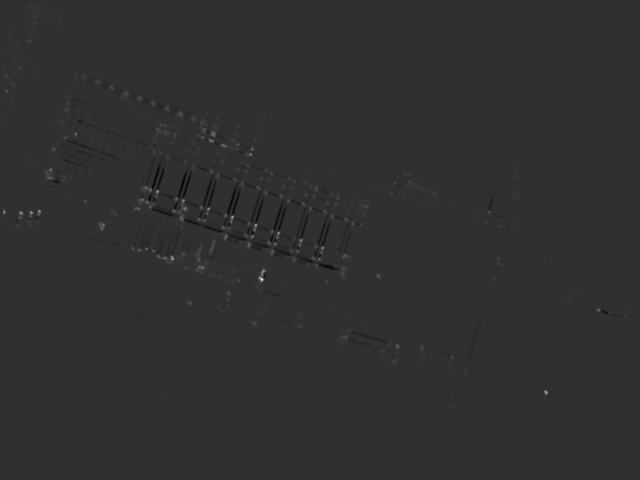

In [5]:
def create_R(image_path, output_file_path):
  image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

  image_grad_x, image_grad_y = calculate_derivatives(image, 3)

  squared_grad_x = image_grad_x * image_grad_x 
  grad_x_multiply_grad_y = image_grad_x * image_grad_y
  squared_grad_y = image_grad_y * image_grad_y

  window_size = 7
  half_window_size = int(window_size / 2)

  gaussian_kernel = get_gaussian_kernel_matrix(window_size)

  R = np.zeros(image.shape, dtype=np.float32)
  alpha = 0.04

  for x_index in range(half_window_size, image.shape[0] - half_window_size):
    for y_index in range(half_window_size, image.shape[1] - half_window_size):
      summed_gaussed_squared_x = sum_gaussian_kernel_in_window(squared_grad_x, x_index, y_index, half_window_size, gaussian_kernel)
      summed_gaussed_squared_y = sum_gaussian_kernel_in_window(squared_grad_y, x_index, y_index, half_window_size, gaussian_kernel)
      summed_gaussed_grad_x_multiply_grad_y = sum_gaussian_kernel_in_window(
          grad_x_multiply_grad_y, x_index, y_index, half_window_size, gaussian_kernel)

      M = np.array([
           [summed_gaussed_squared_x, summed_gaussed_grad_x_multiply_grad_y],
           [summed_gaussed_grad_x_multiply_grad_y, summed_gaussed_squared_y]
           ])

      det_M = np.linalg.det(M)
      trace_M = np.trace(M)

      R[x_index, y_index] = det_M - alpha * np.power(trace_M, 2)
    

  norm_R = cv2.normalize(R, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)

  cv2_imshow(norm_R)
  cv2.imwrite(output_file_path, norm_R)


def ps4_1_b():
  create_R('transA.jpg', 'output/ps4-1-b-1.jpg')
  create_R('transB.jpg', 'output/ps4-1-b-2.jpg')
  create_R('simA.jpg', 'output/ps4-1-b-3.jpg')
  create_R('simB.jpg', 'output/ps4-1-b-4.jpg')



ps4_1_b()

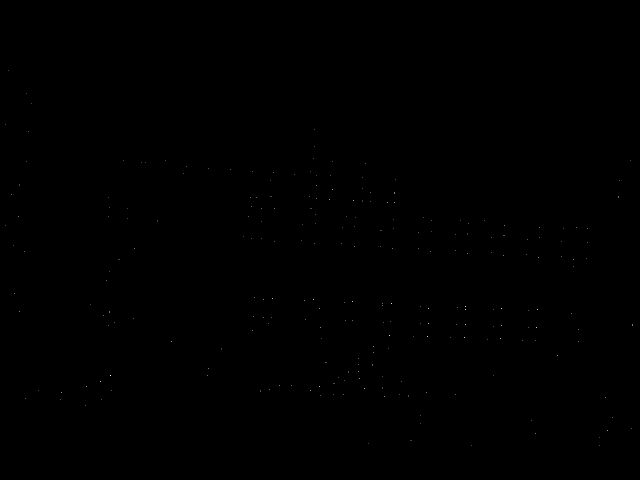

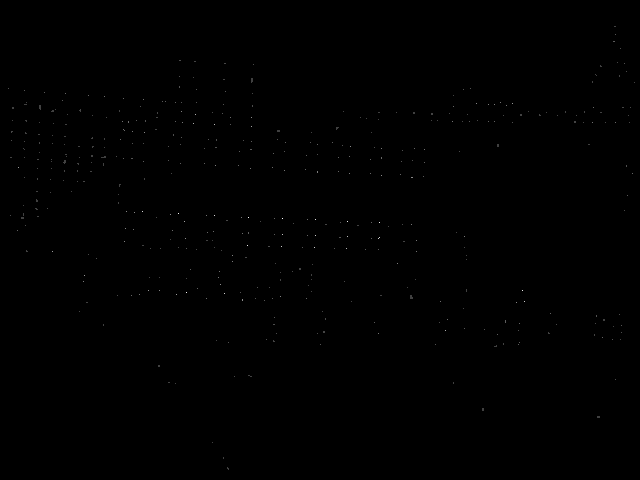

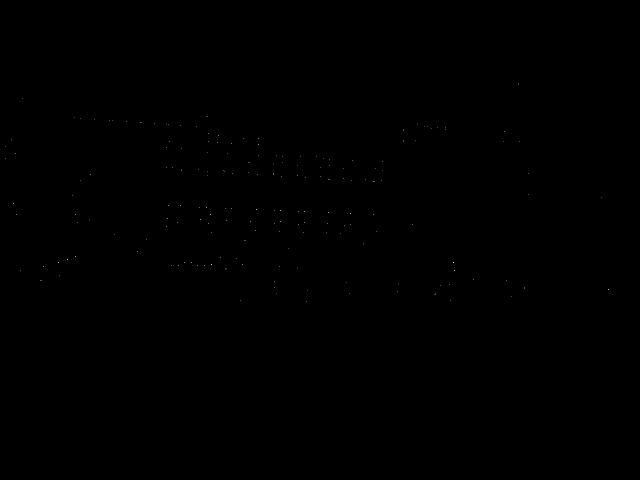

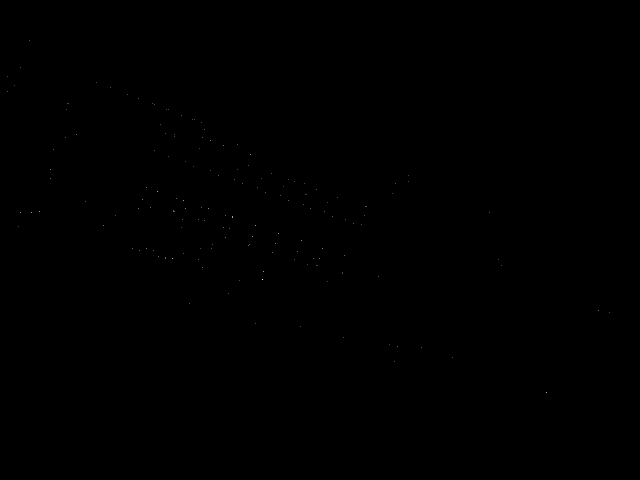

In [6]:
def threshold_and_non_maximal_suppression(image_path, output_path, threshold, radius):
  image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
  threshold = image.max() * threshold 

  _, thresholded_image = cv2.threshold(image, threshold, 255, cv2.THRESH_TOZERO)

  non_maximal_suppressioned_image = np.zeros_like(thresholded_image)
  half_radius = int(radius / 2)

  for x_index in range(half_radius, non_maximal_suppressioned_image.shape[0] - half_radius):
    for y_index in range(half_radius, non_maximal_suppressioned_image.shape[1] - half_radius):
      window = get_window_in_image(image, x_index, y_index, half_radius)

      max_value_in_window = window.max()
      if thresholded_image[x_index, y_index] == max_value_in_window:
        non_maximal_suppressioned_image[x_index, y_index] = max_value_in_window

  cv2_imshow(non_maximal_suppressioned_image)
  cv2.imwrite(output_path, non_maximal_suppressioned_image)

threshold_and_non_maximal_suppression('output/ps4-1-b-1.jpg', 'output/ps4-1-c-1.jpg', 0.25, 11)
threshold_and_non_maximal_suppression('output/ps4-1-b-2.jpg', 'output/ps4-1-c-2.jpg', 0.25, 11)
threshold_and_non_maximal_suppression('output/ps4-1-b-3.jpg', 'output/ps4-1-c-3.jpg', 0.25, 11)
threshold_and_non_maximal_suppression('output/ps4-1-b-4.jpg', 'output/ps4-1-c-4.jpg', 0.25, 11)

In [15]:
import math

def calculate_angle_image(grad_x_image, grad_y_image):
  angle_image = np.zeros_like(grad_x_image)

  for x_index in range(grad_x_image.shape[0]):
    for y_index in range(grad_x_image.shape[1]):
      y_grad_value = grad_y_image[x_index, y_index]
      x_grad_value = grad_x_image[x_index, y_index]

      angle_image[x_index, y_index] = math.atan2(y_grad_value, x_grad_value)
  
  return angle_image


transA = cv2.imread('transA.jpg', cv2.IMREAD_GRAYSCALE)
transA_harris_corners_image = cv2.imread('output/ps4-1-c-1.jpg', cv2.IMREAD_GRAYSCALE)

transB = cv2.imread('transB.jpg', cv2.IMREAD_GRAYSCALE)

transA_grad_x, transA_grad_y = calculate_derivatives(transA, 3)
transA_angle_image = calculate_angle_image(transA_grad_x, transA_grad_y)

threshold_value = 0.25 * transA_harris_corners_image.max()
_, transA_harris_corners_image = cv2.threshold(transA_harris_corners_image, threshold_value, 255, cv2.THRESH_BINARY)

transA_with_key_points = cv2.drawKeypoints(transA, kp, None, color=(255,0,0))

{0: 300992, 1: 2691, 2: 1695, 3: 935, 4: 391, 5: 150, 6: 60, 7: 20, 8: 1, 9: 1, 60: 1, 61: 3, 62: 2, 63: 9, 64: 6, 65: 7, 66: 5, 67: 3, 68: 10, 69: 4, 70: 9, 71: 7, 72: 6, 73: 7, 74: 8, 75: 5, 76: 6, 77: 2, 78: 2, 79: 4, 80: 7, 81: 7, 82: 8, 83: 7, 84: 4, 85: 4, 86: 5, 87: 3, 88: 7, 89: 2, 90: 1, 92: 4, 93: 1, 94: 1, 97: 3, 98: 3, 99: 1, 100: 3, 101: 4, 102: 3, 104: 4, 105: 1, 106: 3, 107: 3, 108: 2, 109: 1, 110: 1, 111: 1, 112: 2, 113: 2, 114: 1, 116: 1, 117: 3, 118: 1, 119: 2, 120: 5, 123: 4, 126: 3, 127: 3, 128: 1, 129: 1, 133: 1, 136: 1, 137: 2, 138: 1, 139: 1, 140: 1, 142: 1, 143: 1, 147: 1, 148: 1, 150: 1, 153: 1, 156: 1, 163: 1, 165: 1, 174: 1, 179: 1, 185: 2, 187: 1, 188: 1, 190: 1, 191: 1, 202: 1, 203: 1, 205: 1, 209: 3, 213: 1, 214: 1, 217: 1, 224: 1, 253: 1}
